# Machine Learning Classification Pipeline
## Logistic Regression & Decision Tree

This notebook demonstrates a complete end-to-end ML pipeline for binary classification using:
- Logistic Regression
- Decision Tree Classifier

Dataset: Binary Classification Dataset (Diabetes Prediction)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (118, 9)

First few rows:


,age,glucose,bp,skin_thickness,insulin,bmi,diabetes_pedigree,pregnancies,outcome
0,29,85,66,29,0,26.6,0.351,0,0
1,29,89,66,23,94,28.1,0.167,0,0
2,31,125,72,29,0,30.1,0.349,0,1
3,32,137,40,35,168,43.1,2.288,0,1
4,33,117,40,31,0,30.5,0.158,0,0


## 2. Data Exploration

In [3]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nDataset Statistics:")
print(df.describe())
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nTarget Distribution:")
print(df['outcome'].value_counts())
print(f"\nClass Balance:\n{df['outcome'].value_counts(normalize=True)}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                118 non-null    int64  
 1   glucose            118 non-null    int64  
 2   bp                 118 non-null    int64  
 3   skin_thickness     118 non-null    int64  
 4   insulin            118 non-null    int64  
 5   bmi                118 non-null    float64
 6   diabetes_pedigree  118 non-null    float64
 7   pregnancies        118 non-null    int64  
 8   outcome            118 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 8.4 KB
None


Dataset Statistics:
              age     glucose          bp  skin_thickness     insulin  \
count  118.000000  118.000000  118.000000      118.000000  118.000000   
mean    46.779661  125.423729   70.644068       12.932203   54.406780   
std     13.597471   24.752590   16.289856       16.121191 

## 3. Data Cleaning

In [4]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

# Handle missing values (replace 0 with NaN for certain columns, then fill)
columns_to_check = ['glucose', 'bp', 'skin_thickness', 'insulin', 'bmi']

for col in columns_to_check:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nDataset cleaned successfully!")

Number of duplicate rows: 0
Shape after removing duplicates: (118, 9)

Missing values after cleaning:
age                  0
glucose              0
bp                   0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
pregnancies          0
outcome              0
dtype: int64

Dataset cleaned successfully!


## 4. Feature Selection and Preprocessing

In [5]:
# Separate features and target
X = df.drop('outcome', axis=1)
y = df['outcome']

print("Features (X):")
print(X.columns.tolist())
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"\nTarget values: {y.unique()}")

Features (X):
['age', 'glucose', 'bp', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'pregnancies']

Shape of X: (118, 8)
Shape of y: (118,)

Target values: [0 1]


## 5. Train-Test Split

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")
print(f"\nTest target distribution:\n{y_test.value_counts()}")

Training set size: (94, 8)
Test set size: (24, 8)

Training target distribution:
outcome
0    59
1    35
Name: count, dtype: int64

Test target distribution:
outcome
0    15
1     9
Name: count, dtype: int64


## 6. Feature Scaling

In [7]:
# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Features scaled successfully!")
print("\nScaled training data statistics:")
print(X_train_scaled.describe())

Features scaled successfully!

Scaled training data statistics:
                age       glucose            bp  skin_thickness       insulin  \
count  9.400000e+01  9.400000e+01  9.400000e+01    9.400000e+01  9.400000e+01   
mean   5.551115e-17  2.763747e-16  5.940874e-16   -1.488171e-16 -1.181088e-16   
std    1.005362e+00  1.005362e+00  1.005362e+00    1.005362e+00  1.005362e+00   
min   -1.333286e+00 -1.690433e+00 -3.975169e+00   -2.688832e+00 -1.213570e+00   
25%   -7.421118e-01 -6.183745e-01 -5.045880e-01    5.100766e-02 -1.731890e-01   
50%   -3.726282e-01 -2.347940e-01  4.209002e-01    5.100766e-02 -1.731890e-01   
75%    5.695551e-01  4.733547e-01  6.522722e-01    5.100766e-02 -1.731890e-01   
max    2.435447e+00  2.912533e+00  1.577760e+00    2.448368e+00  5.702765e+00   

                bmi  diabetes_pedigree  pregnancies  
count  9.400000e+01       9.400000e+01    94.000000  
mean  -4.866084e-16       1.677145e-16     0.000000  
std    1.005362e+00       1.005362e+00     1

## 7. Model Training

### 7.1 Logistic Regression

In [8]:
# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")
print(f"Model coefficients: {logistic_model.coef_}")
print(f"Model intercept: {logistic_model.intercept_}")

Logistic Regression model trained successfully!
Model coefficients: [[-0.30552924  2.21295206  0.57696681 -0.05956992  0.43829803  0.40803314
   1.52627146  0.10055595]]
Model intercept: [-0.66997643]


### 7.2 Decision Tree Classifier

In [9]:
# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree_model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")
print(f"Tree depth: {decision_tree_model.get_depth()}")
print(f"Number of leaves: {decision_tree_model.get_n_leaves()}")

Decision Tree model trained successfully!
Tree depth: 5
Number of leaves: 8


## 8. Model Evaluation

### 8.1 Logistic Regression Evaluation

In [10]:
# Predictions for Logistic Regression
y_pred_lr = logistic_model.predict(X_test_scaled)
y_pred_proba_lr = logistic_model.predict_proba(X_test_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("="*50)
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION RESULTS
Accuracy:  0.7500
Precision: 0.6667
Recall:    0.6667
F1-Score:  0.6667

Confusion Matrix:
[[12  3]
 [ 3  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.67      0.67      0.67         9

    accuracy                           0.75        24
   macro avg       0.73      0.73      0.73        24
weighted avg       0.75      0.75      0.75        24



### 8.2 Decision Tree Evaluation

In [11]:
# Predictions for Decision Tree
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_proba_dt = decision_tree_model.predict_proba(X_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("="*50)
print("DECISION TREE RESULTS")
print("="*50)
print(f"Accuracy:  {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

DECISION TREE RESULTS
Accuracy:  0.9167
Precision: 0.8182
Recall:    1.0000
F1-Score:  0.9000

Confusion Matrix:
[[13  2]
 [ 0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.82      1.00      0.90         9

    accuracy                           0.92        24
   macro avg       0.91      0.93      0.91        24
weighted avg       0.93      0.92      0.92        24



### 8.3 Model Comparison

MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.750000   0.666667 0.666667  0.666667
      Decision Tree  0.916667   0.818182 1.000000  0.900000


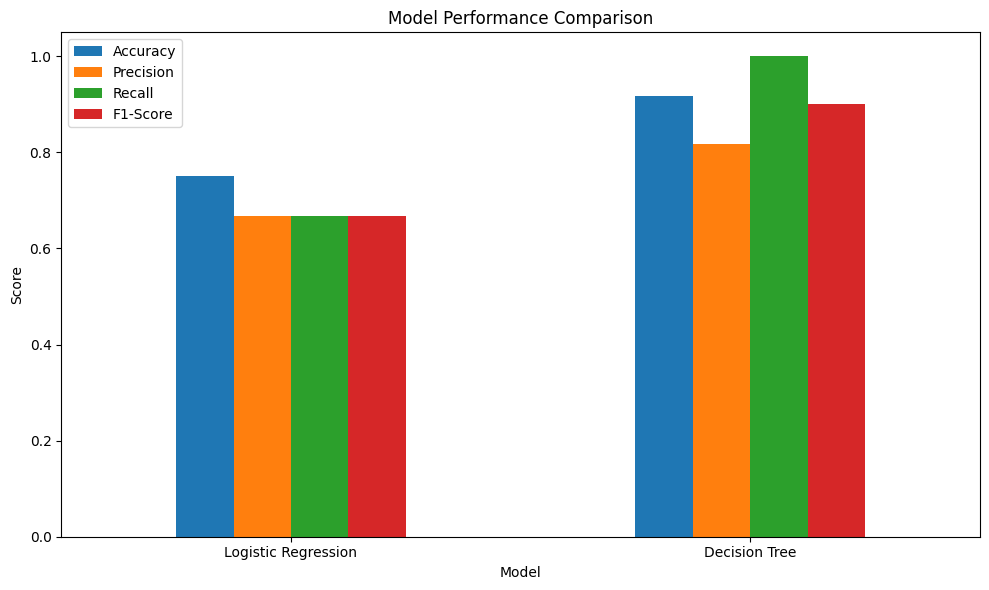


Best Model (by Accuracy): Decision Tree


In [12]:
# Create comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [lr_accuracy, dt_accuracy],
    'Precision': [lr_precision, dt_precision],
    'Recall': [lr_recall, dt_recall],
    'F1-Score': [lr_f1, dt_f1]
})

print("="*50)
print("MODEL COMPARISON")
print("="*50)
print(comparison.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))
comparison.set_index('Model').plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Determine best model
best_model = 'Logistic Regression' if lr_accuracy > dt_accuracy else 'Decision Tree'
print(f"\nBest Model (by Accuracy): {best_model}")

## 9. Export Models

Export both models and the scaler for use in the backend application.

In [13]:
# Export Logistic Regression model
joblib.dump(logistic_model, 'logistic_model.pkl')
print("✓ Logistic Regression model exported: logistic_model.pkl")

# Export Decision Tree model
joblib.dump(decision_tree_model, 'decision_tree.pkl')
print("✓ Decision Tree model exported: decision_tree.pkl")

# Export scaler (needed for Logistic Regression preprocessing)
joblib.dump(scaler, 'scaler.pkl')
print("✓ Scaler exported: scaler.pkl")

# Also copy models to backend/models directory (for deployment)
import os
import shutil

# Create backend/models directory if it doesn't exist
os.makedirs('../backend/models', exist_ok=True)

# Copy models to backend
shutil.copy('logistic_model.pkl', '../backend/models/logistic_model.pkl')
shutil.copy('decision_tree.pkl', '../backend/models/decision_tree.pkl')
shutil.copy('scaler.pkl', '../backend/models/scaler.pkl')

print("\n✓ Models copied to backend/models/ directory")
print("\nAll models exported successfully!")

✓ Logistic Regression model exported: logistic_model.pkl
✓ Decision Tree model exported: decision_tree.pkl
✓ Scaler exported: scaler.pkl

✓ Models copied to backend/models/ directory

All models exported successfully!


## 10. Summary

✅ **Data Loading**: Dataset loaded and explored  
✅ **Data Cleaning**: Missing values and duplicates handled  
✅ **Feature Preprocessing**: Features standardized using StandardScaler  
✅ **Model Training**: Both Logistic Regression and Decision Tree models trained  
✅ **Model Evaluation**: Comprehensive evaluation with accuracy, precision, recall, and F1-score  
✅ **Model Export**: Models exported in .pkl format for backend integration  

### Next Steps:
1. Deploy models to backend API
2. Create frontend interface
3. Deploy application to cloud platforms